In [1]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

In [2]:
# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

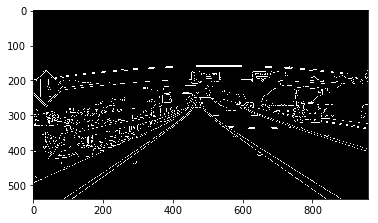

In [3]:
plt.imshow(edges, cmap='Greys_r')

In [4]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2
theta = np.pi * 2.0/360 * 1
threshold = 15
min_line_length = 40
max_line_gap = 20
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [8]:
print lines.shape, edges.shape

(335, 1, 4) (540, 960)


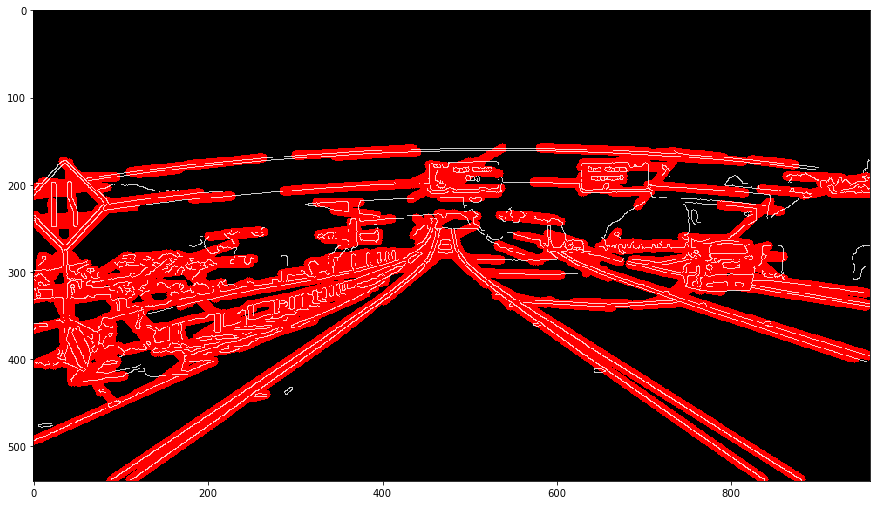

In [9]:
# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(combo)

In [15]:
vertices = np.array([[
                      (0,image.shape[0]),
                      (450, 290), 
                      (490, 290), 
                      (image.shape[1], image.shape[0])
                     ]], dtype=np.int32)

In [16]:
region_image = cv2.fillPoly(image, vertices, color = [255, 0, 0])

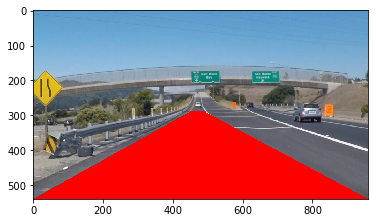

In [17]:
plt.imshow(region_image)

In [19]:
# Mask pixels below the threshold
color_thresholds =  (combo[:,:,0] == 255)

# Find the region inside the lines
region_thresholds = (region_image[:,:,0] == 255)

In [20]:
color_edges[color_thresholds & region_thresholds] = [255, 0, 0]

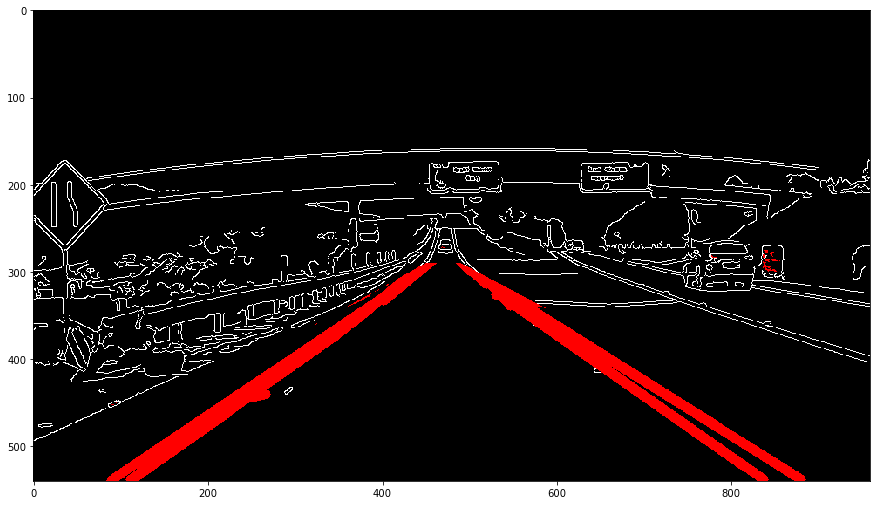

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(color_edges)